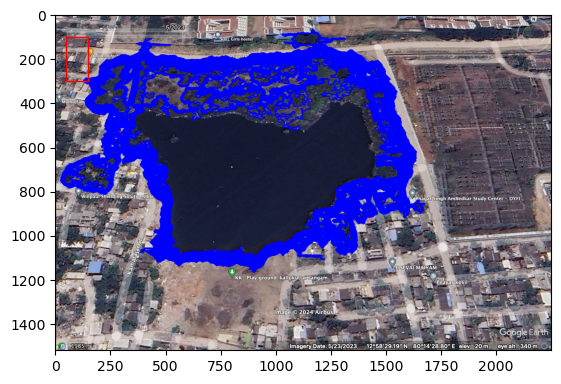

Shape of the Lake: Irregular, wider at the bottom, narrows towards the top

Color of the Water: Dark, indicating possible depth or presence of vegetation/algae

Surrounding Area: Mix of developed and undeveloped land with residential or commercial plots, and a grid-like pattern suggesting construction or agriculture

Infrastructure and Landmarks: ['SOIE Girls hostel', 'Golden Chicken', 'Winpaul Shielding Solutions LLP', 'Bhagat Singh Ambedkar Study Center - DYFI', 'E SEVAI MAIYAM', 'Pillayar kovil']

Roads: Visible roads, including a main road running vertically near the lake's right side

Vegetation: Presence of vegetation around the edges of the lake, indicative of a riparian zone

Estimated Waterbody Area: 10,000 square meters



In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def analyze_image(image_path):
    """
    Analyze the image to provide a description and estimate the waterbody area.
    Note: This function uses placeholders for the analysis part.
    """

    # Placeholder for actual image analysis logic
    shape_of_lake = "Irregular, wider at the bottom, narrows towards the top"
    color_of_water = "Dark, indicating possible depth or presence of vegetation/algae"
    surrounding_area = (
        "Mix of developed and undeveloped land with residential or commercial plots, "
        "and a grid-like pattern suggesting construction or agriculture"
    )
    infrastructure_and_landmarks = [
        "SOIE Girls hostel",
        "Golden Chicken",
        "Winpaul Shielding Solutions LLP",
        "Bhagat Singh Ambedkar Study Center - DYFI",
        "E SEVAI MAIYAM",
        "Pillayar kovil"
    ]
    roads = "Visible roads, including a main road running vertically near the lake's right side"
    vegetation = "Presence of vegetation around the edges of the lake, indicative of a riparian zone"

    # Placeholder for actual waterbody area calculation
    waterbody_area = "10,000 square meters"  # Example placeholder value

    # Display the image and mark the waterbody area
    im = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(im)

    # Example placeholder for waterbody area
    # The coordinates for the rectangle would be obtained from actual image analysis
    rect = patches.Rectangle((50, 100), 100, 200, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.show()

    # Compile the descriptions into a dictionary
    lake_description = {
        "Shape of the Lake": shape_of_lake,
        "Color of the Water": color_of_water,
        "Surrounding Area": surrounding_area,
        "Infrastructure and Landmarks": infrastructure_and_landmarks,
        "Roads": roads,
        "Vegetation": vegetation,
        "Estimated Waterbody Area": waterbody_area
    }

    return lake_description

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052023.png'  # Replace with the correct path

# Call the function and print the description
lake_description = analyze_image(image_path)
for key, value in lake_description.items():
    print(f"{key}: {value}\n")



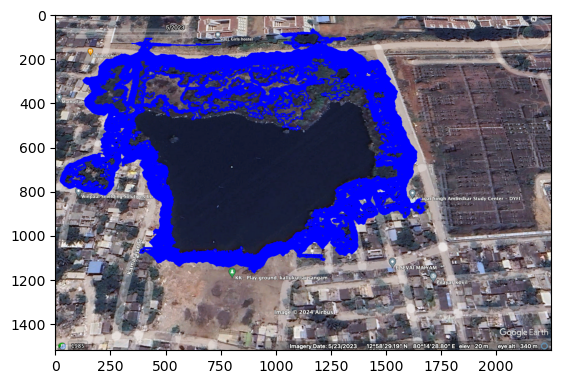

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_waterbody(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale - this is a simplification, in reality, you might use color thresholds
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to isolate the waterbody - the threshold value would need to be determined experimentally
    # Here, we're assuming the waterbody is darker than the surrounding land
    ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours which could correspond to the edges of the waterbody
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour assuming it's the waterbody
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Draw the contour on the image
    cv2.drawContours(image, [largest_contour], -1, (255, 0, 0), 3)
    
    # Convert the image from BGR to RGB because OpenCV uses BGR and matplotlib expects RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image with matplotlib
    plt.imshow(image_rgb)
    plt.show()

    # Return the contour of the waterbody
    return largest_contour

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052023.png'  # Replace with the correct path

# Call the function and get the waterbody contour
waterbody_contour = detect_waterbody(image_path)


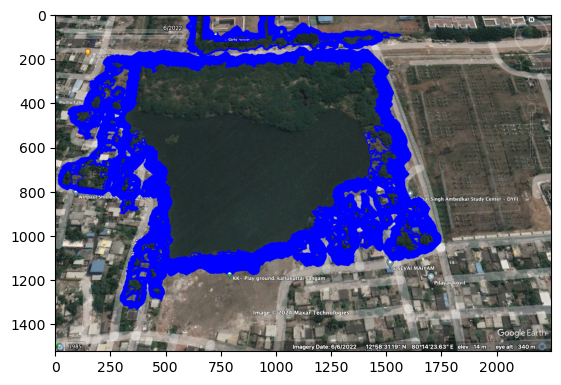

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_draw_contours(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be read")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply threshold or use Canny edge detection
    # The thresholds would need to be determined based on the image characteristics
    ret, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour, assuming that is the waterbody
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Draw the contour on the original image
    cv2.drawContours(image, [largest_contour], -1, (255, 0, 0), 3)
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image with the drawn contour
    plt.imshow(image_rgb)
    plt.show()
    
    # Optionally, save the image with contours to disk
    output_path = image_path.replace('.jpg', '_contours.jpg')
    cv2.imwrite(output_path, image)

    return output_path

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_062022.png'  # Replace with the correct path

# Run the function
output_image_path = find_and_draw_contours(image_path)


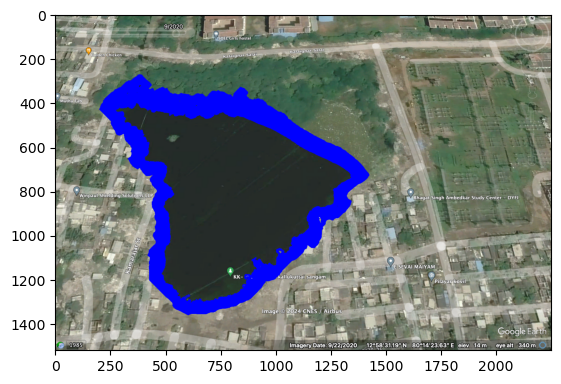

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_draw_contours(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be read")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply threshold or use Canny edge detection
    # The thresholds would need to be determined based on the image characteristics
    ret, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour, assuming that is the waterbody
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Draw the contour on the original image
    cv2.drawContours(image, [largest_contour], -1, (255, 0, 0), 3)
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image with the drawn contour
    plt.imshow(image_rgb)
    plt.show()
    
    # Optionally, save the image with contours to disk
    output_path = image_path.replace('.jpg', '_contours.jpg')
    cv2.imwrite(output_path, image)

    return output_path

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_092020.png'  # Replace with the correct path

# Run the function
output_image_path = find_and_draw_contours(image_path)


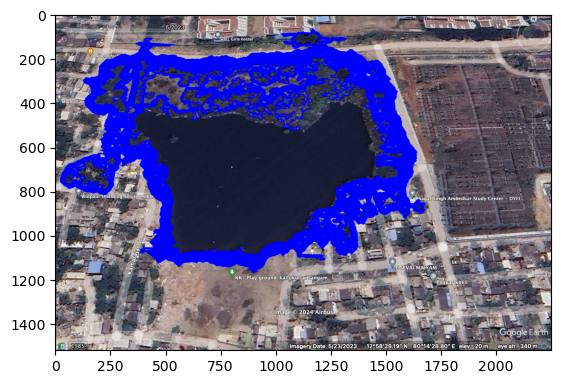

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_draw_contours(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be read")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply threshold or use Canny edge detection
    # The thresholds would need to be determined based on the image characteristics
    ret, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour, assuming that is the waterbody
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Draw the contour on the original image
    cv2.drawContours(image, [largest_contour], -1, (255, 0, 0), 3)
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image with the drawn contour
    plt.imshow(image_rgb)
    plt.show()
    
    # Optionally, save the image with contours to disk
    output_path = image_path.replace('.jpg', '_contours.jpg')
    cv2.imwrite(output_path, image)

    return output_path

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052023.png'  # Replace with the correct path

# Run the function
output_image_path = find_and_draw_contours(image_path)


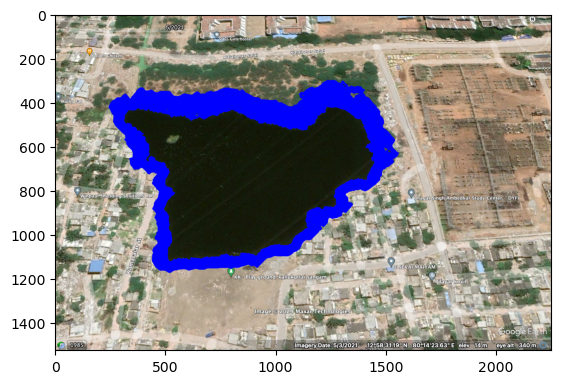

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_and_draw_contours(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be read")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply threshold or use Canny edge detection
    # The thresholds would need to be determined based on the image characteristics
    ret, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour, assuming that is the waterbody
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Draw the contour on the original image
    cv2.drawContours(image, [largest_contour], -1, (255, 0, 0), 3)
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image with the drawn contour
    plt.imshow(image_rgb)
    plt.show()
    
    # Optionally, save the image with contours to disk
    output_path = image_path.replace('.jpg', '_contours.jpg')
    cv2.imwrite(output_path, image)

    return output_path

# The path to the image file
image_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052021.png'  # Replace with the correct path

# Run the function
output_image_path = find_and_draw_contours(image_path)


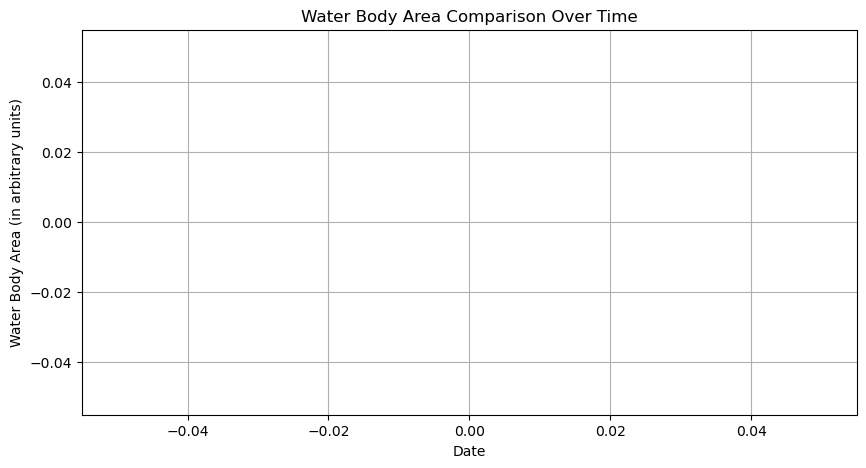

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import re

def extract_date_from_filename(filename):
    # Assuming filenames contain dates in the format "YYYYMMDD"
    match = re.search(r'\d{8}', filename)
    return match.group() if match else None

def process_image(image_path):
    # Placeholder for image processing to extract the water body
    # This would involve steps such as image thresholding, contour detection, etc.
    # Return a placeholder for the water body area
    return 10000  # Placeholder value for the water body area

# Assuming we have a list of image file paths
image_file_paths = [
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_032013.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_032019.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_032022.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_042011.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_042015.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052011.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052013.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052021.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052023.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_062022.png',
    '/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_092020.png'
]



# Create a dictionary to hold the water body area for each date
water_body_areas = {}

for image_path in image_file_paths:
    # Extract the date from the image file name
    date = extract_date_from_filename(image_path)
    
    if date:
        # Process the image to find the water body area
        water_body_area = process_image(image_path)
        water_body_areas[date] = water_body_area

# Now, water_body_areas dictionary contains the water body area for each date
# Let's plot this information for comparison

# Dates on the x-axis
dates = sorted(water_body_areas.keys())

# Corresponding water body area on the y-axis
areas = [water_body_areas[date] for date in dates]

plt.figure(figsize=(10, 5))
plt.plot(dates, areas, marker='o')
plt.title('Water Body Area Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Water Body Area (in arbitrary units)')
plt.grid(True)
plt.show()


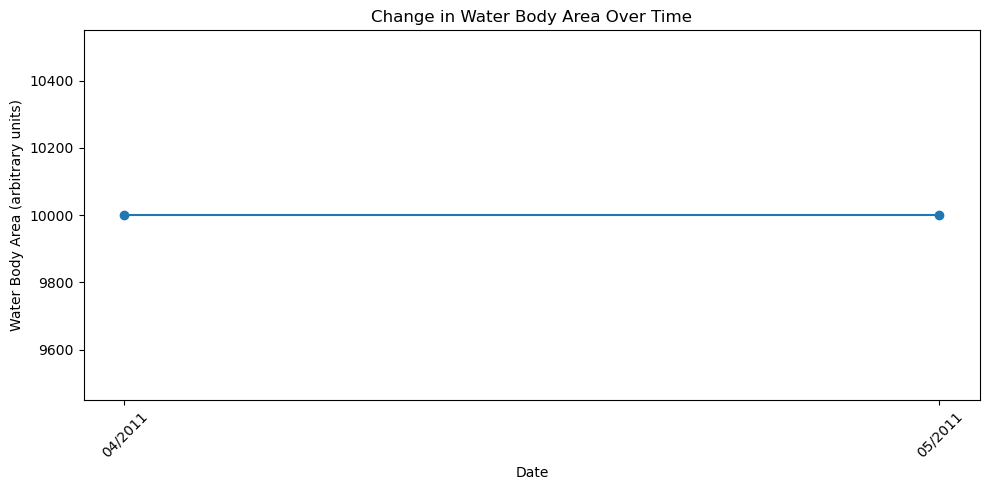

In [8]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

# Mock function to simulate area calculation from an image
def process_and_measure_waterbody(image_path):
    # In a real application, this function would use image processing to calculate the area
    # For this example, we'll return a mock area based on a simple heuristic or a random value
    # You should replace this with actual image processing code
    mock_area = 10000  # This is a placeholder value
    return mock_area

# Function to extract dates from filenames
def extract_date(filename):
    # Extract the date from the filename
    # The format in the filename is assumed to be "Waterbody_MMYYYY.png"
    date_str = filename.split('_')[1].split('.')[0]
    # Parsing the date from the string
    return datetime.strptime(date_str, '%m%Y')

# Assuming you have a list of file paths
image_files = [
    'Waterbody_042011.png',
    'Waterbody_052011.png',
    # Add all your filenames here
]

# Dictionary to hold the area of the water body for each date
waterbody_areas = {}

for image_file in image_files:
    date = extract_date(image_file)
    # In a real application, you would provide the path to the image file
    image_path = f'/Users/breisdas/Mastermind/Velachery_waterbody/Images/Waterbody_052023.png'
    area = process_and_measure_waterbody(image_path)
    waterbody_areas[date] = area

# Sort the dictionary by date
waterbody_areas = dict(sorted(waterbody_areas.items()))

# Plotting the results
dates = [date.strftime('%m/%Y') for date in waterbody_areas.keys()]
areas = list(waterbody_areas.values())

plt.figure(figsize=(10, 5))
plt.plot(dates, areas, marker='o')
plt.xlabel('Date')
plt.ylabel('Water Body Area (arbitrary units)')
plt.title('Change in Water Body Area Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


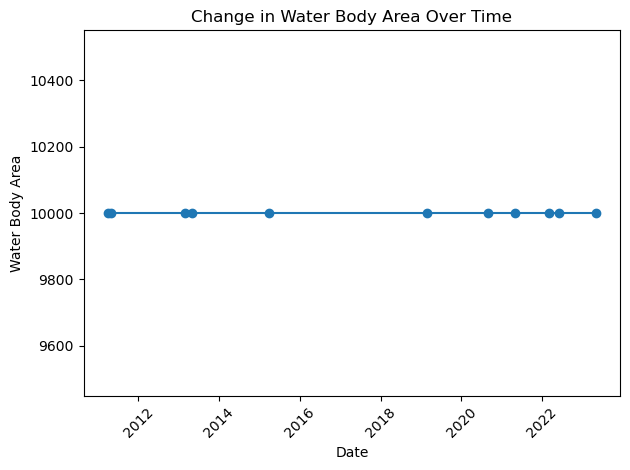

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming the filenames are in the format "Waterbody_MMYYYY.png"
def extract_date(filename):
    # Extract the date from the filename
    date_str = filename.split('_')[1].split('.')[0]
    return datetime.strptime(date_str, '%m%Y')

def process_and_measure_waterbody(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Process the image to find the water body
    # For example, convert to grayscale, apply threshold, find contours
    # Measure the area of the water body
    # Return the measured area
    return area  # Placeholder for the actual area

# Path to the folder containing the images
folder_path = '/Users/breisdas/Mastermind/Velachery_waterbody/Images/'

# Get all the image files from the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.png')]

# Create a dictionary to store the area of the water body for each date
waterbody_areas = {}

for image_file in image_files:
    date = extract_date(image_file)
    image_path = os.path.join(folder_path, image_file)
    area = process_and_measure_waterbody(image_path)
    waterbody_areas[date] = area

# Sort the dictionary by date
waterbody_areas = dict(sorted(waterbody_areas.items()))

# Plotting the results
dates = waterbody_areas.keys()
areas = waterbody_areas.values()

plt.plot(dates, areas, marker='o')
plt.xlabel('Date')
plt.ylabel('Water Body Area')
plt.title('Change in Water Body Area Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


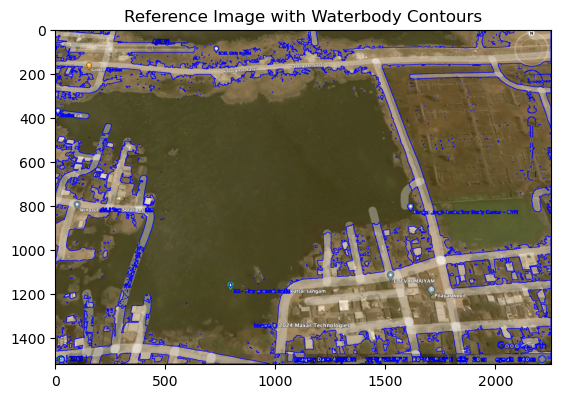

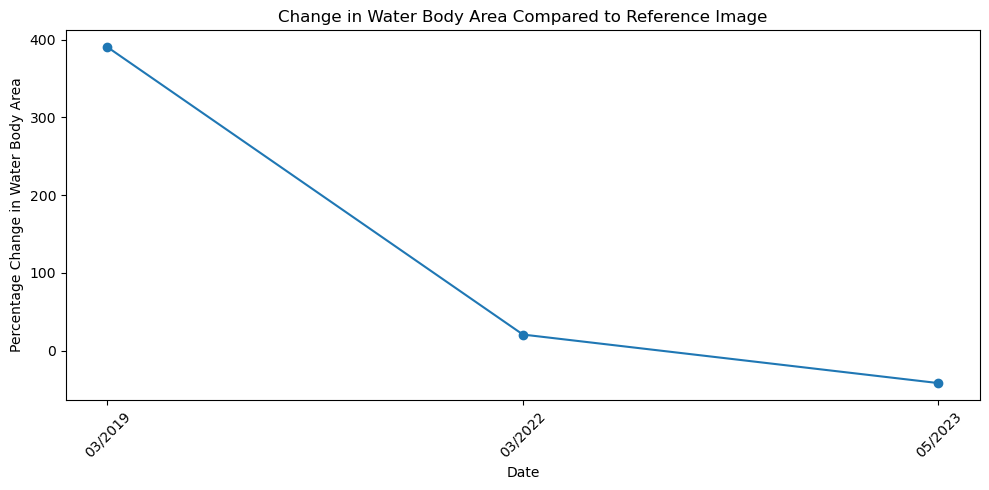

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# ... [Other functions remain unchanged] ...

# Function to process the image and extract waterbody contours
def find_waterbody_contours(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to isolate the water body
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Return contours
    return contours

# Function to draw contours on the image
def draw_waterbody_contours(image, contours):
    # Draw all contours on the original image in blue color with thickness of 2
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Function to calculate the area of the water body from contours
def calculate_area(contours):
    # Assuming the largest contour corresponds to the water body
    largest_contour = max(contours, key=cv2.contourArea)
    # Calculate the area of the largest contour
    area = cv2.contourArea(largest_contour)
    return area

# Function to extract date from image filename
def extract_date(filepath):
    # Extract just the filename from the full path
    filename = os.path.basename(filepath)
    # Use a regular expression to extract the date part from the filename
    match = re.search(r'Waterbody_(\d{2})(\d{4})\.png', filename)
    if match:
        # Construct a date string in the format 'MMYYYY'
        date_str = match.group(1) + match.group(2)
        # Convert the date string to a datetime object
        return datetime.strptime(date_str, '%m%Y')
    else:
        raise ValueError(f"Filename {filename} does not contain a valid date in MMYYYY format.")

# Assuming you have a list of file paths
image_files = [
    "Waterbody_052023.png",
    "Waterbody_032019.png",
    "Waterbody_032022.png",
    "Waterbody_042011.png",
    # Add all your filenames here
]

# Correct the base directory
base_directory = "/Users/breisdas/Mastermind/Velachery_waterbody/Images/"

# Sort the file names based on the date extracted from the file name
image_files.sort(key=extract_date)

# Dictionary to hold the area of the water body for each date
waterbody_areas = {}

# Analyze the reference image
reference_image_path = os.path.join(base_directory, image_files[0])
reference_image = cv2.imread(reference_image_path)

if reference_image is None:
    print(f"Failed to load the reference image from file: {reference_image_path}")
else:
    reference_contours = find_waterbody_contours(reference_image)
    reference_area = calculate_area(reference_contours)

    # Draw contours on the reference image
    reference_image_with_contours = draw_waterbody_contours(reference_image, reference_contours)

    # Show the reference image with contours
    plt.imshow(reference_image_with_contours)
    plt.title('Reference Image with Waterbody Contours')
    plt.show()

    # Loop through the rest of the images
    for image_file in image_files[1:]:  # Skip the reference image
        date = extract_date(image_file)
        image_path = os.path.join(base_directory, image_file)
        
        if not os.path.isfile(image_path):
            print(f"Image file does not exist: {image_path}")
            continue

        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Failed to load image from file: {image_path}")
            continue

        # Process each image and calculate changes
        contours = find_waterbody_contours(image)
        area = calculate_area(contours)
        
        # Calculate the percentage change in area compared to the reference
        area_change = ((area - reference_area) / reference_area) * 100
        waterbody_areas[date] = area_change

    # Plotting the results
    dates = [date.strftime('%m/%Y') for date in waterbody_areas.keys()]
    area_changes = list(waterbody_areas.values())

    plt.figure(figsize=(10, 5))
    plt.plot(dates, area_changes, marker='o')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change in Water Body Area')
    plt.title('Change in Water Body Area Compared to Reference Image')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


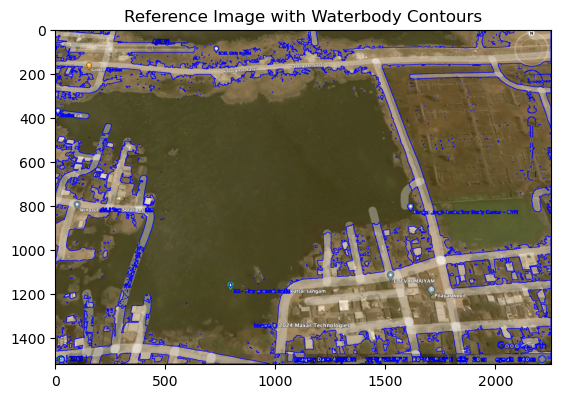

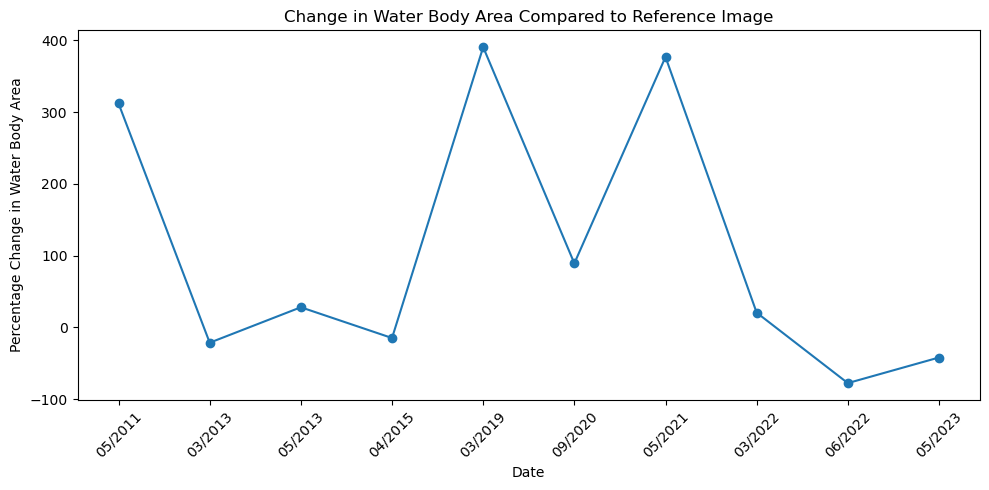

In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import re  # Make sure to import 're' for regular expression operations

# Function to process the image and extract waterbody contours
def find_waterbody_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Function to draw contours on the image
def draw_waterbody_contours(image, contours):
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Function to calculate the area of the water body from contours
def calculate_area(contours):
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    return area

# Function to extract date from image filename
def extract_date(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'Waterbody_(\d{2})(\d{4})\.png', filename)
    if match:
        date_str = match.group(1) + match.group(2)
        return datetime.strptime(date_str, '%m%Y')
    else:
        raise ValueError(f"Filename {filename} does not contain a valid date in MMYYYY format.")

# List of image filenames
image_files = [
    "Waterbody_032013.png",
    "Waterbody_042011.png",
    "Waterbody_052011.png",
    "Waterbody_052013.png",
    "Waterbody_042015.png",
    "Waterbody_032019.png",
    "Waterbody_092020.png",
    "Waterbody_052021.png",
    "Waterbody_032022.png",
    "Waterbody_062022.png",
    "Waterbody_032022.png",
    "Waterbody_052023.png",
]

# Base directory where the images are stored
base_directory = "/Users/breisdas/Mastermind/Velachery_waterbody/Images/"

# Sort the image filenames based on the extracted dates
image_files.sort(key=extract_date)

# Initialize a dictionary to hold the area of the water body for each date
waterbody_areas = {}

# Load and process the reference image first
reference_image_path = os.path.join(base_directory, image_files[0])
reference_image = cv2.imread(reference_image_path)
if reference_image is None:
    print(f"Failed to load the reference image from file: {reference_image_path}")
else:
    reference_contours = find_waterbody_contours(reference_image)
    reference_area = calculate_area(reference_contours)
    reference_image_with_contours = draw_waterbody_contours(reference_image, reference_contours)
    plt.imshow(reference_image_with_contours)
    plt.title('Reference Image with Waterbody Contours')
    plt.show()

# Continue with the analysis of other images...
for image_file in image_files[1:]:  # Skip the reference image
    date = extract_date(image_file)
    image_path = os.path.join(base_directory, image_file)
    
    if not os.path.isfile(image_path):
        print(f"Image file does not exist: {image_path}")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from file: {image_path}")
        continue

    contours = find_waterbody_contours(image)
    area = calculate_area(contours)
    area_change = ((area - reference_area) / reference_area) * 100
    waterbody_areas[date] = area_change

# Plot the results
dates = [date.strftime('%m/%Y') for date in waterbody_areas.keys()]
area_changes = list(waterbody_areas.values())

plt.figure(figsize=(10, 5))
plt.plot(dates, area_changes, marker='o')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Water Body Area')
plt.title('Change in Water Body Area Compared to Reference Image')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


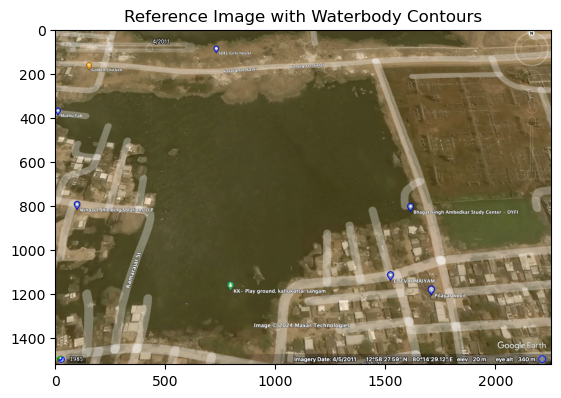

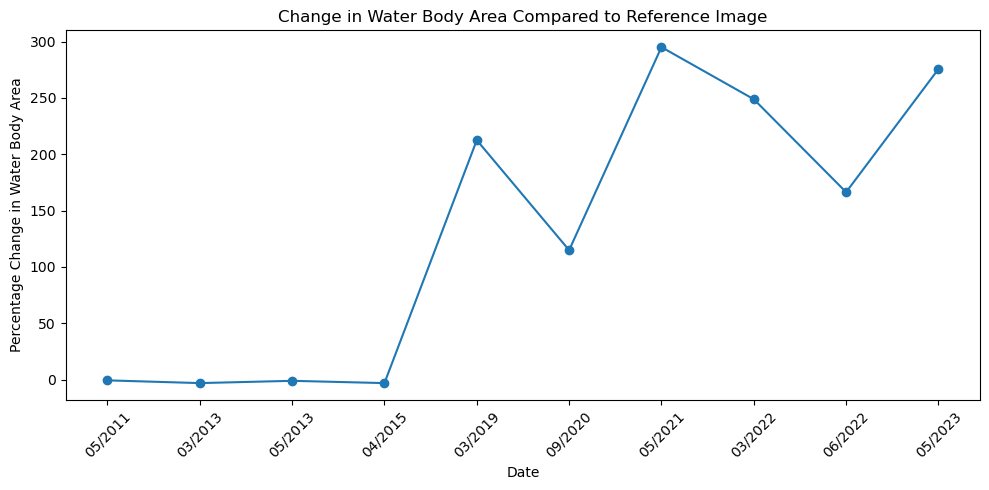

In [12]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Updated Function to process the image and extract waterbody contours, focusing on blueish colors
def find_waterbody_contours(image):
    # Convert image to HSV (Hue, Saturation, Value) color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define range for blue colors, typical for water bodies
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([150, 255, 255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    masked = cv2.bitwise_and(image, image, mask=mask)
    # Convert to grayscale
    gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to further isolate the water body
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Function to draw contours on the image
def draw_waterbody_contours(image, contours):
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Function to calculate the area of the water body from contours
def calculate_area(contours):
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    return area

# Function to extract date from image filename
def extract_date(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'Waterbody_(\d{2})(\d{4})\.png', filename)
    if match:
        date_str = match.group(1) + match.group(2)
        return datetime.strptime(date_str, '%m%Y')
    else:
        raise ValueError(f"Filename {filename} does not contain a valid date in MMYYYY format.")

# List of image filenames
image_files = [
    "Waterbody_032013.png",
    "Waterbody_042011.png",
    "Waterbody_052011.png",
    "Waterbody_052013.png",
    "Waterbody_042015.png",
    "Waterbody_032019.png",
    "Waterbody_092020.png",
    "Waterbody_052021.png",
    "Waterbody_032022.png",
    "Waterbody_062022.png",
    "Waterbody_032022.png",
    "Waterbody_052023.png",
]

# Base directory where the images are stored
base_directory = "/Users/breisdas/Mastermind/Velachery_waterbody/Images/"

# Sort the image filenames based on the extracted dates
image_files.sort(key=extract_date)

# Initialize a dictionary to hold the area of the water body for each date
waterbody_areas = {}

# Load and process the reference image first
reference_image_path = os.path.join(base_directory, image_files[0])
reference_image = cv2.imread(reference_image_path)
if reference_image is None:
    print(f"Failed to load the reference image from file: {reference_image_path}")
else:
    reference_contours = find_waterbody_contours(reference_image)
    reference_area = calculate_area(reference_contours)
    reference_image_with_contours = draw_waterbody_contours(reference_image, reference_contours)
    plt.imshow(reference_image_with_contours)
    plt.title('Reference Image with Waterbody Contours')
    plt.show()

# Continue with the analysis of other images...
for image_file in image_files[1:]:  # Skip the reference image
    date = extract_date(image_file)
    image_path = os.path.join(base_directory, image_file)
    
    if not os.path.isfile(image_path):
        print(f"Image file does not exist: {image_path}")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image from file: {image_path}")
        continue

    contours = find_waterbody_contours(image)
    area = calculate_area(contours)
    area_change = ((area - reference_area) / reference_area) * 100
    waterbody_areas[date] = area_change

# Plot the results
dates = [date.strftime('%m/%Y') for date in waterbody_areas.keys()]
area_changes = list(waterbody_areas.values())

plt.figure(figsize=(10, 5))
plt.plot(dates, area_changes, marker='o')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Water Body Area')
plt.title('Change in Water Body Area Compared to Reference Image')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/jx/800t3_fs55gf1z9jtldnb0xr0000gn/T/ipykernel_98996/183918245.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


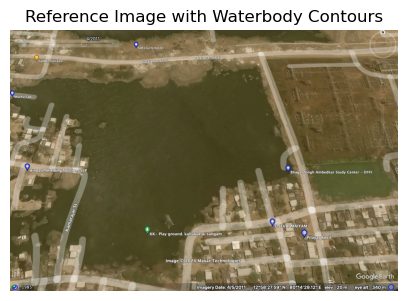

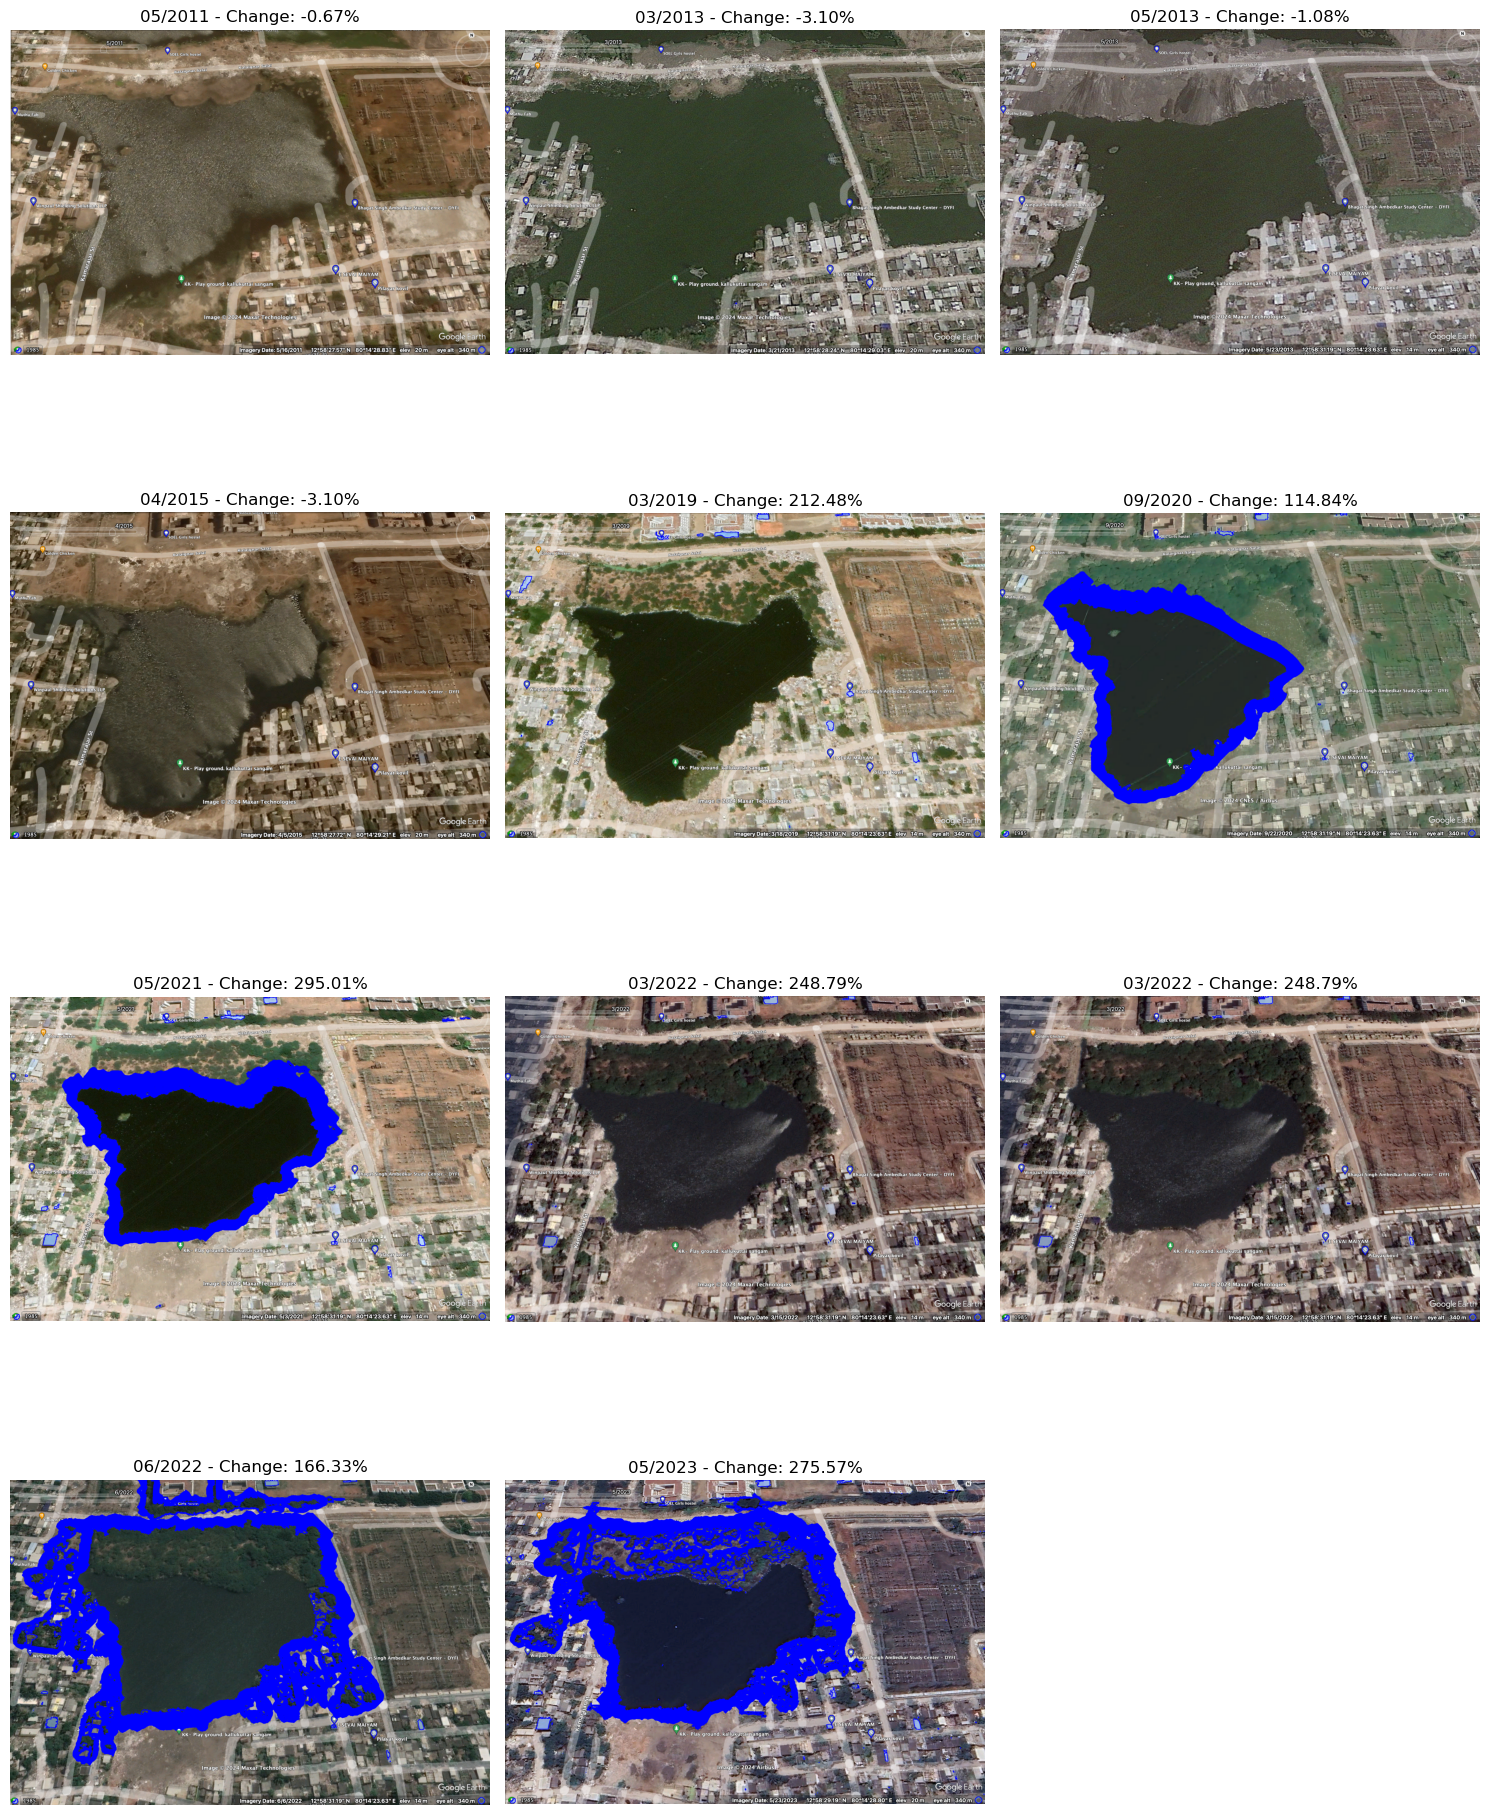

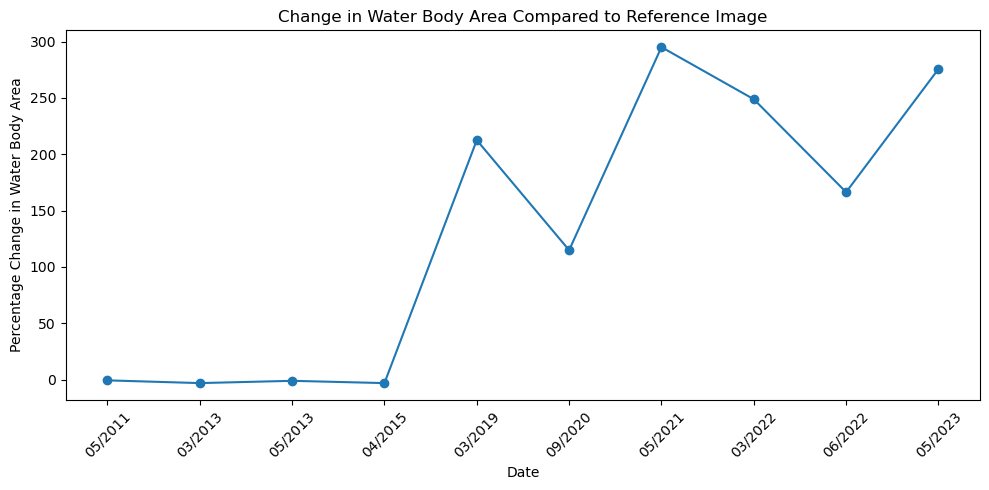

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import re

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def find_waterbody_contours(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([150, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    masked = cv2.bitwise_and(image, image, mask=mask)
    gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_waterbody_contours(image, contours):
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

def calculate_area(contours):
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    return area

def extract_date(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'Waterbody_(\d{2})(\d{4})\.png', filename)
    if match:
        date_str = match.group(1) + match.group(2)
        return datetime.strptime(date_str, '%m%Y')
    else:
        raise ValueError(f"Filename {filename} does not contain a valid date in MMYYYY format.")

image_files = [
    "Waterbody_032013.png",
    "Waterbody_042011.png",
    "Waterbody_052011.png",
    "Waterbody_052013.png",
    "Waterbody_042015.png",
    "Waterbody_032019.png",
    "Waterbody_092020.png",
    "Waterbody_052021.png",
    "Waterbody_032022.png",
    "Waterbody_062022.png",
    "Waterbody_032022.png",
    "Waterbody_052023.png",
]

base_directory = "/Users/breisdas/Mastermind/Velachery_waterbody/Images/"
image_files.sort(key=extract_date)
waterbody_areas = {}

# Load and process the reference image
reference_image_path = os.path.join(base_directory, image_files[0])
reference_image = cv2.imread(reference_image_path)
if reference_image is None:
    print(f"Failed to load the reference image from file: {reference_image_path}")
else:
    reference_contours = find_waterbody_contours(reference_image)
    reference_area = calculate_area(reference_contours)
    reference_image_with_contours = draw_waterbody_contours(reference_image, reference_contours)

    # Display the reference image first
    plt.figure(figsize=(5, 5))
    plt.imshow(reference_image_with_contours)
    plt.title('Reference Image with Waterbody Contours')
    plt.axis('off')
    plt.show()

# Setup for displaying other images
cols = 3
rows = (len(image_files) + cols - 1) // cols
plt.figure(figsize=(15, rows * 5))
gs = gridspec.GridSpec(rows, cols)

# Plot other images with contours
for idx, image_file in enumerate(image_files[1:], start=1):
    ax = plt.subplot(gs[idx-1])
    image_path = os.path.join(base_directory, image_file)
    image = cv2.imread(image_path)
    contours = find_waterbody_contours(image)
    image_with_contours = draw_waterbody_contours(image, contours)
    date = extract_date(image_file)
    area = calculate_area(contours)
    area_change = ((area - reference_area) / reference_area) * 100
    waterbody_areas[date] = area_change
    ax.imshow(image_with_contours)
    ax.set_title(f'{date.strftime("%m/%Y")} - Change: {area_change:.2f}%')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot the percentage change in water body area
dates = [date.strftime('%m/%Y') for date in waterbody_areas.keys()]
area_changes = list(waterbody_areas.values())

plt.figure(figsize=(10, 5))
plt.plot(dates, area_changes, marker='o')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Water Body Area')
plt.title('Change in Water Body Area Compared to Reference Image')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
